In [1]:
import os, sys
currentdir = os.path.dirname(os.path.realpath(os.path.abspath("")))
scriptsdir = currentdir
if scriptsdir not in sys.path:
    sys.path.append(scriptsdir)

from customscripts import configuration
from customscripts import utils
# Common imports

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import category_encoders as ce
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

In [2]:
data = utils.get_clean_food_dataset()

data

,Date,Trade Flow Code,Trade Flow,Reporter,Partner,Commodity Code,Commodity,Trade Value (US$)
0,2018,1,Import,CAN,World,2,Meat and edible meat offal,1924724587
1,2018,2,Export,CAN,World,2,Meat and edible meat offal,5109384612
2,2018,2,Export,CAN,AFG,2,Meat and edible meat offal,79016
3,2018,2,Export,CAN,ALB,2,Meat and edible meat offal,1108403
4,2018,2,Export,CAN,DZA,2,Meat and edible meat offal,25008
...,...,...,...,...,...,...,...,...
849262,2001,2,Export,USA,Venezuela,22,"Beverages, spirits and vinegar",3414509
849263,2001,2,Export,USA,WSM,22,"Beverages, spirits and vinegar",67205
849264,2001,2,Export,USA,YEM,22,"Beverages, spirits and vinegar",59851
849265,2001,1,Import,USA,Serbia and Montenegro,22,"Beverages, spirits and vinegar",377174


In [3]:
print(f"The records are from {len(data['Date'].unique())} different years: {data['Date'].unique()} \n")
print(f"There are {len(data['Trade Flow'].unique())} kinds of trade flows: {data['Trade Flow'].unique()} \n")
print(f"There are totally {len(data['Reporter'].unique())} reporters: {data['Reporter'].unique()} \n")
print(f"There are totally {len(data['Partner'].unique())} partners\n")
print(f"There are totally {len(data['Commodity Code'].unique())} kinds of commodities")

The records are from 20 different years: [2018 2019 2017 2016 2014 2015 2012 2013 2010 2011 2008 2009 2007 2006
 2004 2005 2002 2003 2000 2001] 

There are 2 kinds of trade flows: ['Import' 'Export'] 

There are totally 13 reporters: ['CAN' 'CHN' 'FRA' 'DEU' 'CHN, HKG' 'IND' 'ITA' 'JPN' 'MEX' 'NLD' 'KOR'
 'GBR' 'USA'] 

There are totally 247 partners

There are totally 17 kinds of commodities


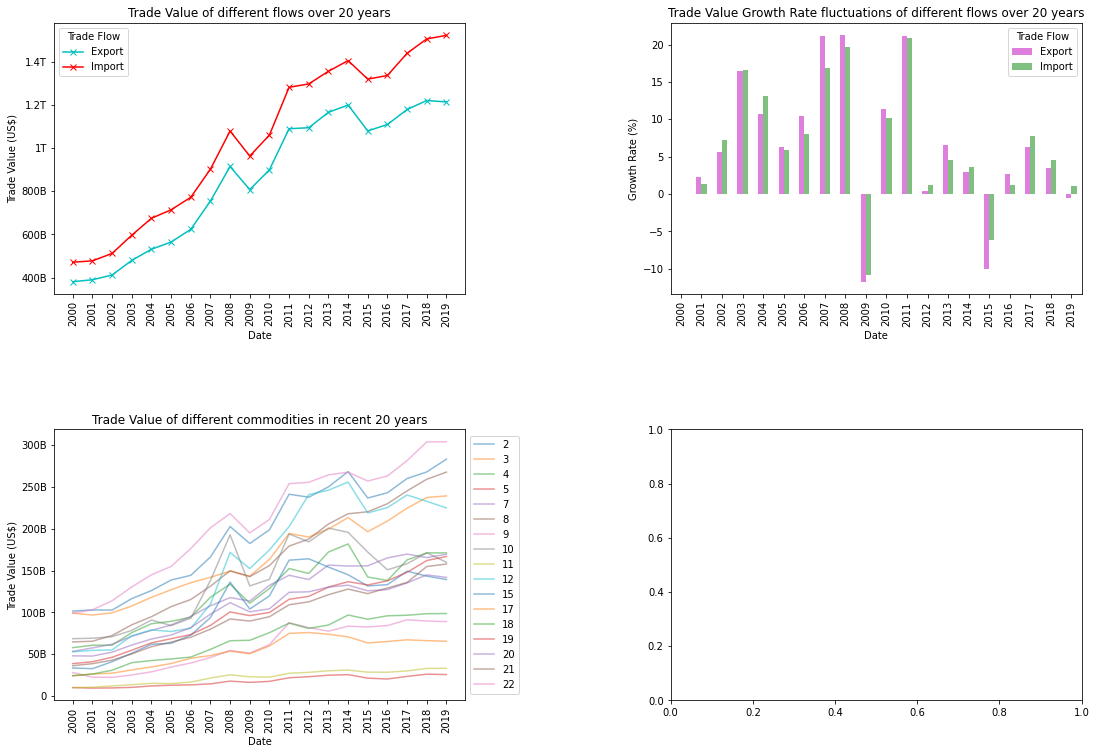

In [4]:
temp_data = data.copy()
temp_data["Date"] = temp_data["Date"].astype(str)
formatter = ticker.FuncFormatter(utils.human_format)

fig_23, ax_23 = plt.subplots(2, 2, figsize=(15, 10))
# unpack all the axes subplots
ax_23_unpack = ax_23.ravel()
# set the layout between different subplots for better visualization
fig_23.tight_layout();
plt.subplots_adjust(wspace=0.5, hspace=0.5);

# show the trend of trade values of different trade flows over 20 years
flow_year_value = temp_data['Trade Value (US$)'] \
    .groupby([temp_data['Date'], temp_data['Trade Flow']]) \
    .sum() \
    .unstack();
flow_year_value.plot(ax=ax_23_unpack[0], color=['c','r'], title="Trade Value of different flows over 20 years", rot=45, marker='x');
ax_23_unpack[0].yaxis.set_major_formatter(formatter);
ax_23_unpack[0].yaxis.set_label_text("Trade Value (US$)");
ax_23_unpack[0].set_xticks(range(len(flow_year_value)));
ax_23_unpack[0].set_xticklabels(["%s" % item for item in flow_year_value.index.tolist()], rotation=90);
# total trade value with the development of time
year_value = data.groupby('Date')['Trade Value (US$)'].sum()

flow_year_growth_value = flow_year_value.diff()
num = flow_year_growth_value
den = flow_year_value.shift()
flow_year_grawth_rate = num / den * 100
flow_year_grawth_rate.plot(ax=ax_23_unpack[1], kind='bar', color=['m', 'g'], alpha=0.5, title='Trade Value Growth Rate fluctuations of different flows over 20 years', rot=45);
ax_23_unpack[1].yaxis.set_label_text("Growth Rate (%)");
ax_23_unpack[1].set_xticks(range(len(flow_year_grawth_rate)));
ax_23_unpack[1].set_xticklabels(["%s" % item for item in flow_year_grawth_rate.index.tolist()], rotation=90);

# show the trend of diffent kind of commodities over 20 years
commodity_value_year = temp_data['Trade Value (US$)'] \
    .groupby([temp_data['Date'], temp_data['Commodity Code']]) \
    .sum() \
    .unstack();
commodity_value_year.plot(ax=ax_23_unpack[2], alpha=0.5, title="Trade Value of different commodities in recent 20 years", rot=45).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax_23_unpack[2].yaxis.set_major_formatter(formatter);
ax_23_unpack[2].yaxis.set_label_text("Trade Value (US$)");
ax_23_unpack[2].set_xticks(range(len(commodity_value_year)));
ax_23_unpack[2].set_xticklabels(["%s" % item for item in commodity_value_year.index.tolist()], rotation=90);



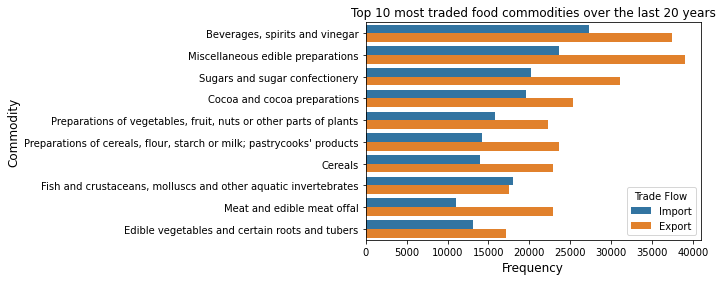

In [5]:
sns.countplot(y="Commodity",  data=data, hue="Trade Flow",
              order=data['Commodity'].value_counts(ascending=False).iloc[:10].index);
plt.title('Top 10 most traded food commodities over the last 20 years');
plt.xlabel('Frequency', fontsize=12);
plt.ylabel('Commodity', fontsize=12);
plt.show();

<AxesSubplot:title={'center':'Ratio between export/import'}, xlabel='Reporter', ylabel='Export / Import Ratio'>

Text(0, 0.5, 'Trade Value (US$)')

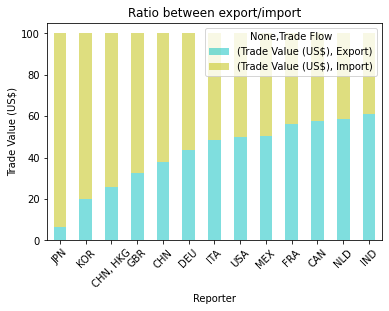

In [6]:
fig_42, ax_42 = plt.subplots()

# then we can campare the ratio of these 2 kinds of flows for each countries
ratio_reporter = data[data["Trade Flow"].isin(["Import", "Export"])] \
    .groupby(["Reporter", "Trade Flow"]).agg({"Trade Value (US$)": sum}) \
    .groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().fillna(0) \
    .sort_values(by=('Trade Value (US$)', 'Import'), ascending=False)
ratio_reporter.plot(kind="bar", ax=ax_42, stacked=True, title="Ratio between export/import", ylabel="Export / Import Ratio", color=['c','y'], rot=45, alpha=0.5);
ax_42.yaxis.set_major_formatter(formatter)
ax_42.yaxis.set_label_text("Trade Value (US$)")

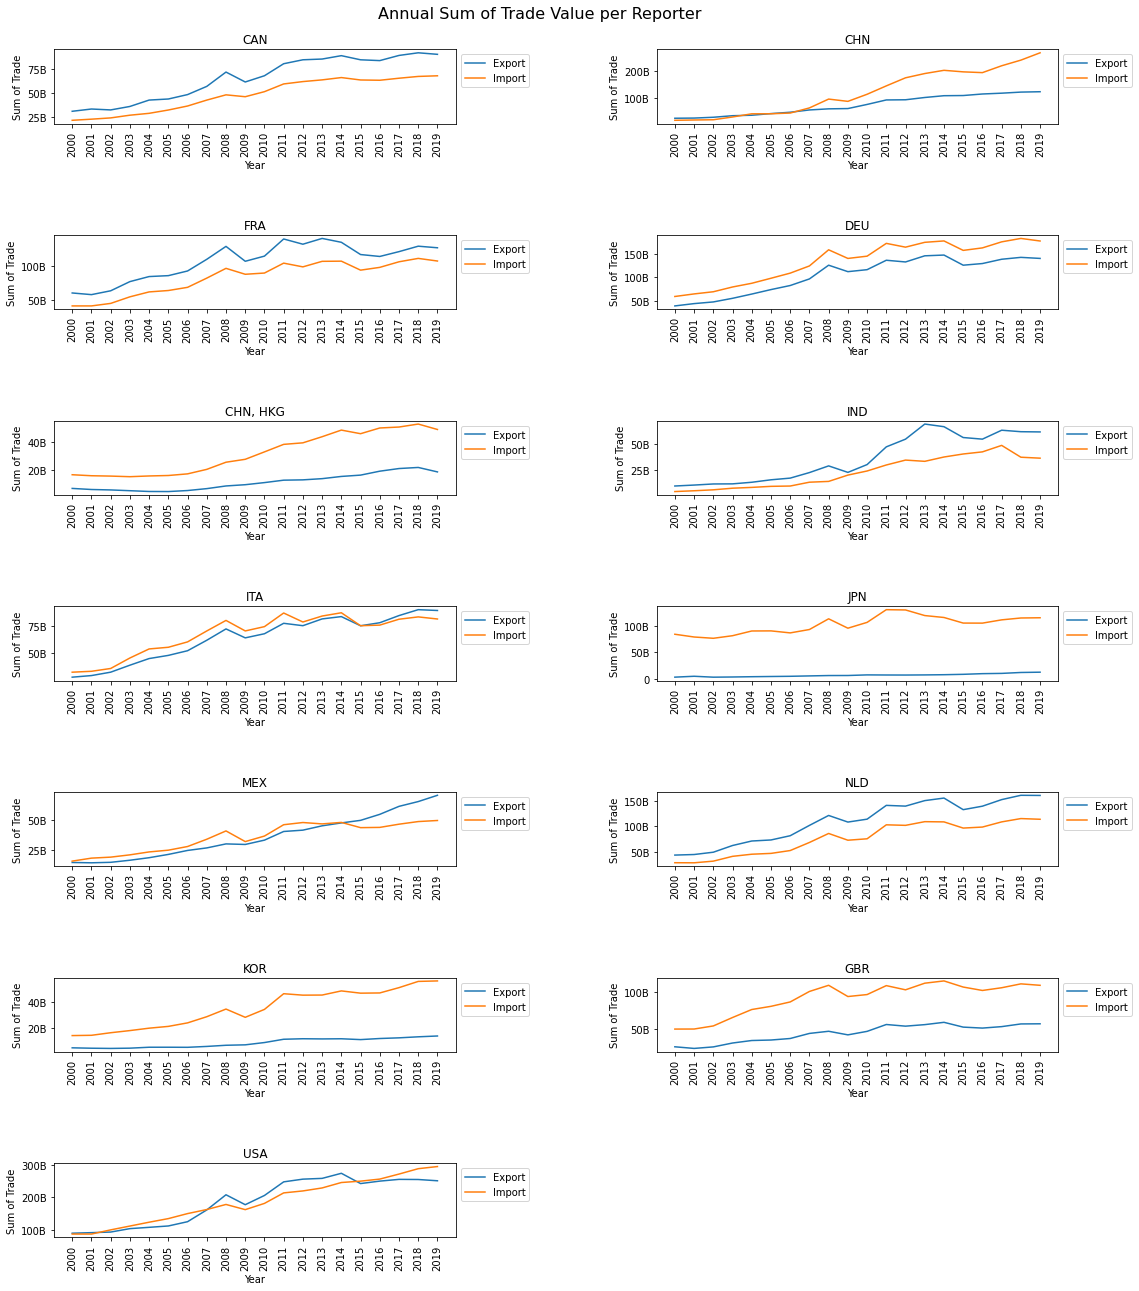

In [7]:
import matplotlib.dates as mdates
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(utils.human_format))
temp_data = data.copy()
temp_data['Date'] = pd.to_datetime(temp_data['Date'], format='%Y')
df_agg = (temp_data.groupby(['Date', 'Reporter', 'Trade Flow']).agg(Trade_Value=("Trade Value (US$)", "sum"))).reset_index()

#years = pd.DatetimeIndex(df_agg['Year'].unique()).year
categories = temp_data['Reporter'].unique().tolist()
fig = plt.figure(figsize=(18,20))
spec2 = gridspec.GridSpec(ncols=2, nrows=7, figure=fig)
fig.tight_layout()
fig.subplots_adjust(hspace=1.5, wspace=0.5, top=0.95)
count = 0

for a in range(7):
    for b in range(2):
        if count != 13:
            cat = categories[count]
            x = df_agg[df_agg['Reporter'] ==cat]["Date"]
            y = df_agg[df_agg['Reporter'] == cat]["Trade_Value"]
            ax = fig.add_subplot(spec2[a,b])
            sns.lineplot(ax=ax, x=x, y=y, data=df_agg, hue="Trade Flow");
            ax.legend(loc="upper left", bbox_to_anchor=(1,1));
            ax.xaxis.set_major_locator(mdates.YearLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
            #ax.yaxis.set_ticks(np.arange(0, 100000000, 100000000000))
            ax.yaxis.set_major_formatter(ticker.FuncFormatter(utils.human_format));
            plt.xticks(rotation=90)
            ax.set_xlabel('Year');
            ax.set_ylabel('Sum of Trade');
            ax.set_title(cat);
            count = count +1;

fig.suptitle("Annual Sum of Trade Value per Reporter", fontsize=16);

In [10]:
commodity_value_year_reporter_flow = temp_data['Trade Value (US$)'] \
    .groupby([temp_data['Date'], temp_data['Commodity Code'], temp_data['Reporter'], temp_data['Trade Flow']]) \
    .sum() \
    .unstack().reset_index()
commodity_value_2000_reporter_flow = commodity_value_year_reporter_flow.loc[commodity_value_year_reporter_flow['Date'] == '2000']
commodity_value_2000_USA_flow = commodity_value_2000_reporter_flow.loc[commodity_value_2000_reporter_flow['Reporter'] == 'USA']
commodity_value_2000_USA_flow["Sum"] = commodity_value_2000_USA_flow["Export"] + commodity_value_2000_USA_flow["Import"]
commodity_value_2000_USA_flow.sort_values(by="Sum", ascending=True)
# commodity_value_year_USA_flow = commodity_value_year_reporter_flow['USA'].reset_index()
# commodity_value_year_USA_flow.loc[commodity_value_year_USA_flow['Date'] == '2010']

Trade Flow,Date,Commodity Code,Reporter,Export,Import,Sum
116,2000-01-01,11,USA,923048450,614535878,1537584328
51,2000-01-01,5,USA,868274132,1078549578,1946823710
38,2000-01-01,4,USA,1549158108,2126687504,3675845612
168,2000-01-01,18,USA,1149096134,2816560356,3965656490
155,2000-01-01,17,USA,1359827424,2923836896,4283664320
142,2000-01-01,15,USA,2942562170,2792661654,5735223824
181,2000-01-01,19,USA,2847729846,3557249212,6404979058
90,2000-01-01,9,USA,778972174,6398371706,7177343880
207,2000-01-01,21,USA,5112267776,2548105984,7660373760
64,2000-01-01,7,USA,3771253572,5299895500,9071149072


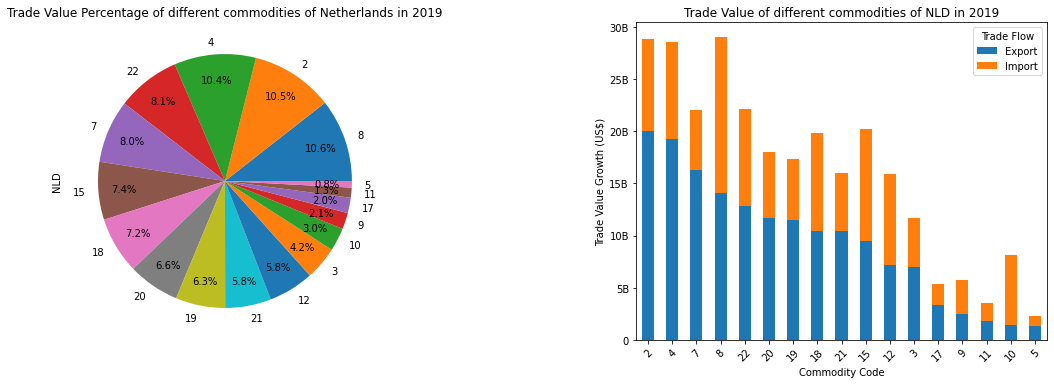

In [27]:
# above graph shows the trade value growth and rate of 20 years in total
# let's visualize the data of individual commodities
# take the commodity with code '2' for example
fig_51, ax_51 = plt.subplots(1, 2, figsize=(15, 5))
# unpack all the axes subplots
ax_51_unpack = ax_51.ravel()
# set the layout between different subplots for better visualization
fig_51.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

data_tmp = data.copy()
data_tmp["Date"] = data_tmp["Date"].astype(str)

commodity_value_year_reporter = data_tmp['Trade Value (US$)'] \
    .groupby([data_tmp['Date'], data_tmp['Commodity Code'], data_tmp['Reporter']]) \
    .sum() \
    .unstack()

commodity_value_year_reporter_flow = data_tmp['Trade Value (US$)'] \
    .groupby([data_tmp['Date'], data_tmp['Commodity Code'], data_tmp['Reporter'], data_tmp['Trade Flow']]) \
    .sum() \
    .unstack().reset_index()

# draw the commodity trade value in particular reporter, particular year
# for example, commodity trade value of NLD in 2019
commodity_value_year_reporter['NLD'] \
    .loc['2019'] \
    .sort_values(ascending=False) \
    .plot(ax=ax_51_unpack[0], kind='pie', autopct="%.1f%%", pctdistance=0.8, title='Trade Value Percentage of different commodities of Netherlands in 2019');

commodity_value_2019_reporter_flow = commodity_value_year_reporter_flow.loc[commodity_value_year_reporter_flow['Date'] == '2019']
commodity_value_2019_NLD_flow = commodity_value_2019_reporter_flow.loc[commodity_value_2019_reporter_flow['Reporter'] == 'NLD']
commodity_value_2019_NLD_flow["Sum"] = commodity_value_2019_NLD_flow["Export"] + commodity_value_2019_NLD_flow["Import"]
commodity_value_2019_NLD_flow = commodity_value_2019_NLD_flow.sort_values(by="Export", ascending=False)
commodity_value_2019_NLD_flow \
    .plot(ax=ax_51_unpack[1], kind='bar', x='Commodity Code', y=['Export', 'Import'], stacked=True, title='Trade Value of different commodities of NLD in 2019', rot=45)
ax_51_unpack[1].yaxis.set_major_formatter(formatter);
ax_51_unpack[1].yaxis.set_label_text('Trade Value Growth (US$)');

# can also be applied to other reporters in different years
# can just replace reporter with partner and then get the corresponding data of partners

<AxesSubplot:title={'center':'Trade Value Percentage of different commodities of USA in 2019'}, ylabel='USA'>

<AxesSubplot:title={'center':'Trade Value of different commodities of USA in 2019'}, xlabel='Commodity Code'>

Text(564.6704545454544, 0.5, 'Trade Value Growth (US$)')

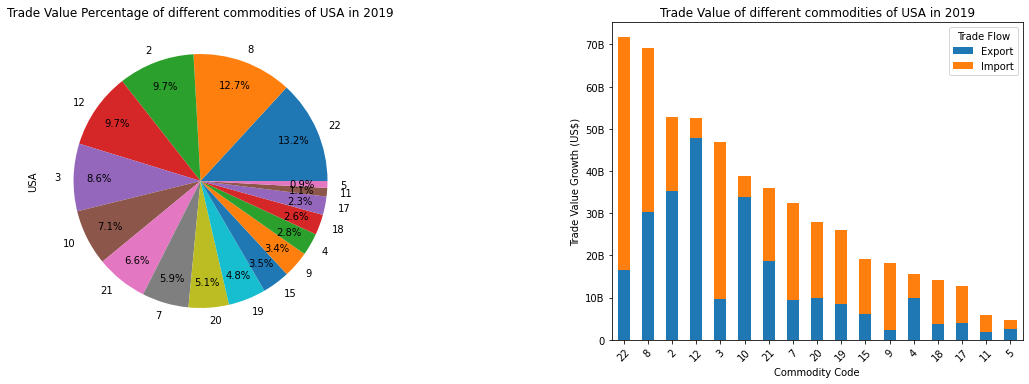

In [28]:
# above graph shows the trade value growth and rate of 20 years in total
# let's visualize the data of individual commodities
# take the commodity with code '2' for example
fig_52, ax_52 = plt.subplots(1, 2, figsize=(15, 5))
# unpack all the axes subplots
ax_52_unpack = ax_52.ravel()
# set the layout between different subplots for better visualization
fig_52.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

data_tmp = data.copy()
data_tmp["Date"] = data_tmp["Date"].astype(str)

commodity_value_year_reporter = data_tmp['Trade Value (US$)'] \
    .groupby([data_tmp['Date'], data_tmp['Commodity Code'], data_tmp['Reporter']]) \
    .sum() \
    .unstack()

commodity_value_year_reporter_flow = data_tmp['Trade Value (US$)'] \
    .groupby([data_tmp['Date'], data_tmp['Commodity Code'], data_tmp['Reporter'], data_tmp['Trade Flow']]) \
    .sum() \
    .unstack().reset_index()

# draw the commodity trade value in particular reporter, particular year
# for example, commodity trade value of USA in 2019
commodity_value_year_reporter['USA'] \
    .loc['2019'] \
    .sort_values(ascending=False) \
    .plot(ax=ax_52_unpack[0], kind='pie', autopct="%.1f%%", pctdistance=0.8, title='Trade Value Percentage of different commodities of USA in 2019')

commodity_value_2019_reporter_flow = commodity_value_year_reporter_flow.loc[commodity_value_year_reporter_flow['Date'] == '2019']
commodity_value_2019_USA_flow = commodity_value_2019_reporter_flow.loc[commodity_value_2019_reporter_flow['Reporter'] == 'USA']
commodity_value_2019_USA_flow["Sum"] = commodity_value_2019_USA_flow["Export"] + commodity_value_2019_USA_flow["Import"]

commodity_value_2019_USA_flow.sort_values(by="Sum", ascending=False) \
    .plot(ax=ax_52_unpack[1], kind='bar', x='Commodity Code', y=['Export', 'Import'], stacked=True, title='Trade Value of different commodities of USA in 2019', rot=45)
ax_52_unpack[1].yaxis.set_major_formatter(formatter)
ax_52_unpack[1].yaxis.set_label_text('Trade Value Growth (US$)')


# can also be applied to other reporters in different years
# can just replace reporter with partner and then get the corresponding data of partners

In [12]:
# let's dig into the trade value of individual reporter and see it's relationship with other dimensions
reporter_partner = data['Trade Value (US$)'] \
    .groupby([data['Partner'], data['Reporter']]) \
    .sum() \
    .unstack()

reporter_partner_flow = data['Trade Value (US$)'] \
    .groupby([data['Partner'], data['Reporter'], data['Trade Flow']]) \
    .sum() \
    .unstack() \
    .reset_index()

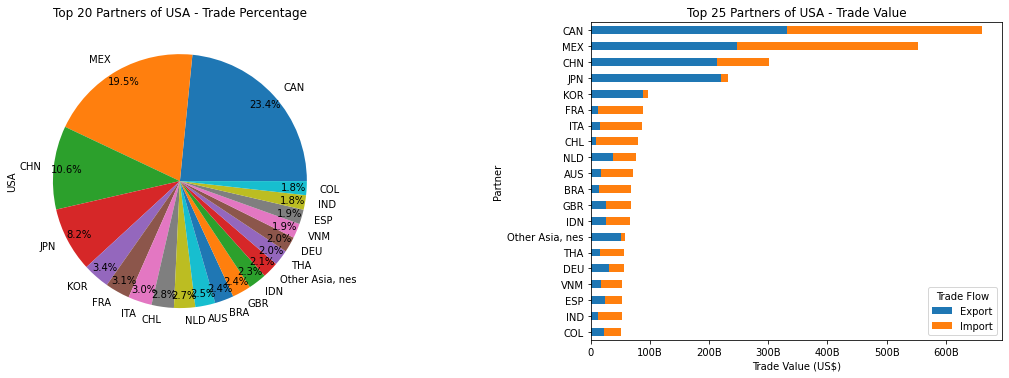

In [31]:
fig_34, ax_34 = plt.subplots(1, 2, figsize=(15, 5))
# unpack all the axes subplots
ax_34_unpack = ax_34.ravel()
# set the layout between different subplots for better visualization
fig_34.tight_layout();
plt.subplots_adjust(wspace=0.5, hspace=0.5);

# since world is included in partner, which is the sum of remaining countries, we need to delete this items
# also when the large number of partnes is not good for visualization, so just choose the top 20 here
USA_partner = reporter_partner['USA'] \
    .sort_values(ascending=False)[1:21]
USA_partner.plot(kind='pie', ax=ax_34_unpack[0], autopct="%.1f%%", pctdistance=0.9, title='Top 20 Partners of USA - Trade Percentage');

# here arise the problem of ordering....
USA_partner_flow = reporter_partner_flow \
    .loc[reporter_partner_flow['Reporter'] == 'USA'] \
    .fillna(0);

USA_partner_flow["Sum"] = USA_partner_flow["Export"] + USA_partner_flow["Import"]
USA_partner_flow.sort_values(by="Sum", ascending=False)[1:21].sort_values(by="Sum", ascending=True) \
    .plot(kind='barh', x='Partner', y=["Export", "Import"], stacked=True, ax=ax_34_unpack[1], title='Top 25 Partners of USA - Trade Value');
ax_34_unpack[1].xaxis.set_major_formatter(formatter);
ax_34_unpack[1].xaxis.set_label_text('Trade Value (US$)');


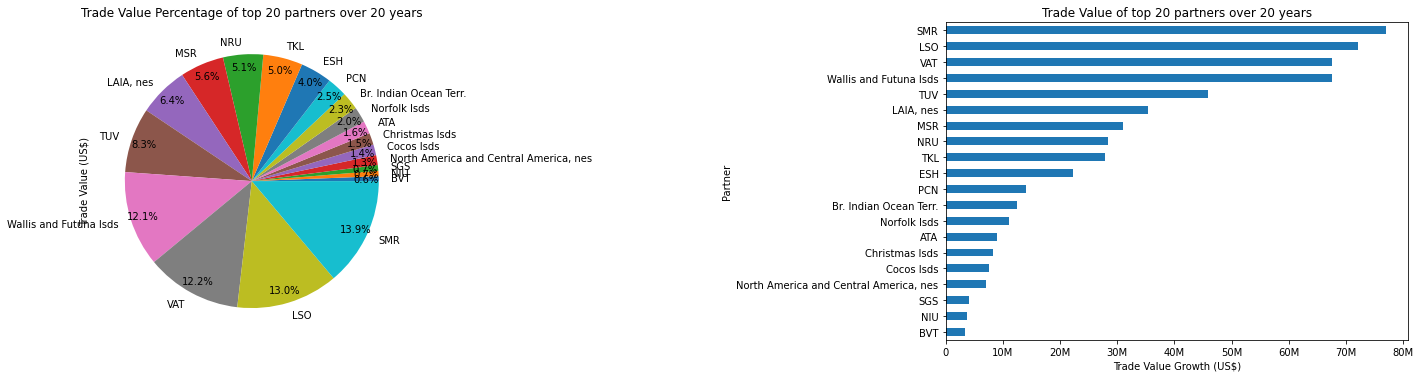

In [18]:
partner_value_order = data \
    .groupby("Partner")["Trade Value (US$)"] \
    .sum() \
    .sort_values(ascending=True) \
    .head(21)[1:]


fig_63, ax_63 = plt.subplots(1, 2, figsize=(20, 5))
# unpack all the axes subplots
ax_63_unpack = ax_63.ravel()
# set the layout between different subplots for better visualization
fig_63.tight_layout();
plt.subplots_adjust(wspace=1.0, hspace=0.5);

partner_value_order.plot(ax=ax_63_unpack[0], kind='pie', autopct="%.1f%%", pctdistance=0.9, title='Trade Value Percentage of top 20 partners over 20 years');
partner_value_order.plot(ax=ax_63_unpack[1], kind='barh', title='Trade Value of top 20 partners over 20 years');
ax_63_unpack[1].xaxis.set_major_formatter(formatter);
ax_63_unpack[1].xaxis.set_label_text('Trade Value Growth (US$)');

In [15]:
partner_reporter = data['Trade Value (US$)'] \
    .groupby([data['Reporter'], data['Partner']]) \
    .sum() \
    .unstack()
partner_reporter_flow = data['Trade Value (US$)'] \
    .groupby([data['Reporter'], data['Partner'], data['Trade Flow']]) \
    .sum() \
    .unstack() \
    .reset_index()

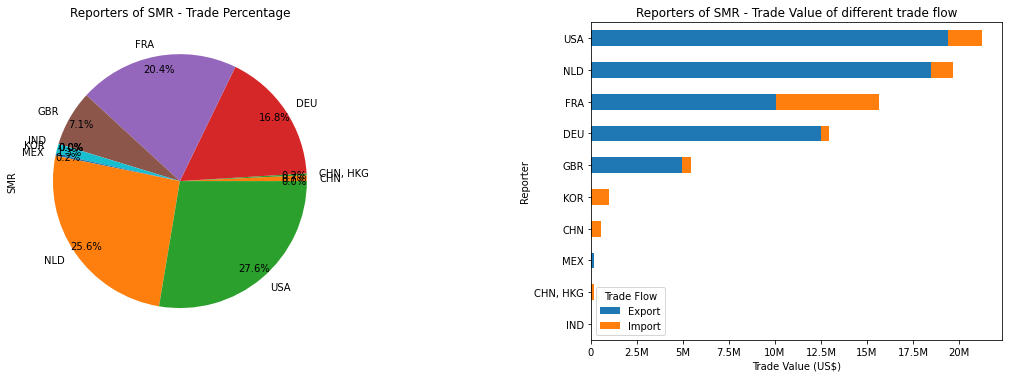

In [16]:
fig_86, ax_86 = plt.subplots(1, 2, figsize=(15, 5))
# unpack all the axes subplots
ax_86_unpack = ax_86.ravel()
# set the layout between different subplots for better visualization
fig_86.tight_layout();
plt.subplots_adjust(wspace=0.5, hspace=0.5)


# show the percentage of each reporters
SMR_reporter = partner_reporter['SMR']
SMR_reporter.plot(kind='pie', ax=ax_86_unpack[0], autopct="%.1f%%", pctdistance=0.9, title='Reporters of SMR - Trade Percentage')

# then the trade value of each reporters
SMR_reporter_flow = partner_reporter_flow \
    .loc[partner_reporter_flow['Partner']=='SMR'] \
    .fillna(0)
SMR_reporter_flow["Sum"] = SMR_reporter_flow["Export"] + SMR_reporter_flow["Import"]
SMR_reporter_flow.sort_values(by="Sum", ascending=True) \
    .plot(kind='barh', ax=ax_86_unpack[1], title='Reporters of SMR - Trade Value of different trade flow', x='Reporter', y=["Export", "Import"], stacked=True)
ax_86_unpack[1].xaxis.set_major_formatter(formatter);
ax_86_unpack[1].xaxis.set_label_text('Trade Value (US$)');